In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 크롤링
from bs4 import BeautifulSoup
from selenium import webdriver
import time, sys

# 시각화 맵
import folium

# Label encoder
from sklearn.preprocessing import LabelEncoder

# dtclf
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()

from sklearn.preprocessing import Binarizer

from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score



In [21]:
df_t = sns.load_dataset('titanic')

df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# age_new 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

for column in ['sex', 'embarked', 'age_new'] :
    datas = df_t[column].unique()
    for i, d in enumerate(datas) :
        df_t[column].replace(d, i, inplace=True)
        
for i in ['sex', 'embarked'] : 
    encoder = LabelEncoder()
    encoder.fit(df_t[i])
    df_t[i] = encoder.transform(df_t[i])
    
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df1_{i}_encoder'].transform(df_t[i])
    
# 타이타닉 데이터 전처리

df_t = sns.load_dataset('titanic')
df_t.drop(columns=['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], inplace=True)

# 연령의 결측치 해결
age_md = df_t.groupby(['pclass', 'sex']).age.agg(['median'])
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'male'][0]
df_t.loc[(df_t['sex'] == 'male') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'male'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 1) & (df_t.age.isna()), "age"] = age_md.loc[1, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 2) & (df_t.age.isna()), "age"] = age_md.loc[2, 'female'][0]
df_t.loc[(df_t['sex'] == 'female') & (df_t['pclass'] == 3) & (df_t.age.isna()), "age"] = age_md.loc[3, 'female'][0]

# embarked 결측치 해결
df_t.embarked.fillna(df_t.embarked.unique()[0], inplace=True)

# 연령층 별 컬럼 생성.
df_t.loc[df_t.age >= 50, "age_new"] = "old"
df_t.loc[(df_t.age < 50) & (df_t.age>=10), "age_new"] = "young"
df_t.loc[df_t.age < 10, "age_new"] = "baby"

# 불필요 컬럼 제거
df_t.drop(columns=['deck', 'sibsp', 'parch', 'age', 'embarked'], inplace=True)

# df_t.info()
# sex, embarked, age_new 해결해야함

# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'survived', 'age_new']:
    globals()[f'df_t{i}_encoder'] = LabelEncoder()
    globals()[f'df_t{i}_encoder'].fit(df_t[i])
    df_t[i] = globals()[f'df_t{i}_encoder'].transform(df_t[i])

# 타이타닉 머신러닝 예측 학습

# 머신러닝이 목적으로 할 데이터를 설정
X = df_t.drop(columns='survived')
y = df_t['survived']

from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()

# fit = 머신러닝의 학습의 의미
dtclf.fit(X, y)


DecisionTreeClassifier()

In [22]:
df_test = pd.read_csv('./test.csv')

# df_test.info()
# Name, Sex, Ticket, Cabin, Embarked 해결 필요

# 연령의 결측치 해결
# fare 결측치 해결
age_md = df_test.groupby(['Pclass', 'Sex']).Age.agg(['median'])
fare_md = df_test.groupby(['Pclass', 'Sex']).Fare.agg(['median'])
for i in ['male', 'female'] : 
    for y in range(1, 4) : 
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Age.isna()), 'Age'] = age_md.loc[{y}, '{i}'][0]"
        f"df_test.loc[(df_test['Sex'] == '{i}') & (df_test['Pclass'] == {y}) & (df_test.Fare.isna()), 'Fare'] = fare_md.loc[{y}, '{i}'][0]"
        

# 결측치가 너무 많은 데이터, 컬럼 삭제
df_test.drop(columns=['Cabin'], inplace=True)

# age_new 생성
df_test.loc[df_test.Age >= 50, "age_new"] = "old"
df_test.loc[(df_test.Age < 50) & (df_test.Age>=10), "age_new"] = "young"
df_test.loc[df_test.Age < 10, "age_new"] = "baby"

# 필요 없는 데이터 제거
df_test.drop(columns=['Name', 'Ticket', 'PassengerId', "SibSp", "Parch", 'Age', 'Embarked'], inplace=True)


# 컬럼 소문자로 변경 
l1 = []
for i in list(df_test.columns):
    l1.append(i.lower())
df_test.set_axis(l1, axis='columns', inplace=True)

# Index(['pclass', 'sex', 'age', 'fare', 'embarked', 'predict survived'], dtype='object')
# Labeling으로 문자형 데이터를 숫자형으로 변환
for i in ['sex', 'age_new']:
    globals()[f'df_test{i}_encoder'] = LabelEncoder()
    globals()[f'df_test{i}_encoder'].fit(df_test[i])
    df_test[i] = globals()[f'df_test{i}_encoder'].transform(df_test[i])

# fare 결측치 해결    
df_test['fare'].fillna(df_test['fare'].mean(), inplace=True)
# df_test[df_test['fare'].isna() == True] 

In [23]:
# 새로운 타이타닉 데이터 생존 여부 예측
pred_result = dtclf.predict(df_test)
pred_result_2 =  df_tsurvived_encoder.inverse_transform(pred_result)
df_test['survived'] = pred_result_2

In [29]:
df_test.drop(columns="fare", inplace=True)

In [58]:
from sklearn.model_selection import train_test_split

X = df_t.drop('fare', axis=1)
y = df_t.fare

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
# 직접구현
# X_train = df_t.iloc[:round(891 * 0.7), 1:]
# X_test = df_t.iloc[round(891 * 0.3), 1:]
# y_train = df_t.iloc[:round(891 * 0.7), 0]
# y_test = df_t.iloc[round(891 * 0.3), 0]

# np.random.shuffle
dtrgs = DecisionTreeRegressor()#ccp : 분기점
dtrgs.fit(X_train, y_train)
# predict이 필요한 이유 : 정답이 없는 경우가 있기 때문.
dt_pred = dtrgs.predict(X_test)

In [36]:
# fare 예측
pred_result = dtrgs.predict(df_test)
# pred_result_2 =  df_testsurvived_encoder.inverse_transform(pred_result)
df_test['fare'] = pred_result


/Users/werther/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


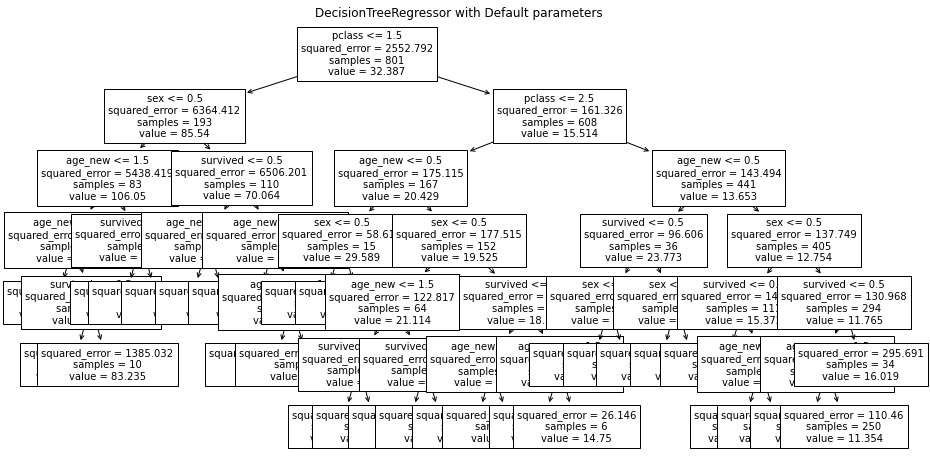

In [62]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

plot_tree(dtrgs, feature_names=X_train.columns, fontsize=10, ax=ax1)
ax1.set_title('DecisionTreeRegressor with Default parameters')
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred) :
#     print("-" * 5)
#     print("오차 행렬\n",confusion_matrix(y_test, pred))
#     print("정확도 : %.2f" %accuracy_score(y_test, pred))
#     print("정밀도 : %.2f" %precision_score(y_test, pred))
#     print("재현율 : %.2f" %recall_score(y_test, pred))
#     print("f1 Score : %.2f" %f1_score(y_test, pred))
#     print("AUC : %.2f" % roc_auc_score(y_test, pred))
#     print("-" * 5)
    return accuracy_score(y_test, pred), precision_score(y_test, pred),recall_score(y_test, pred), f1_score(y_test, pred), roc_auc_score(y_test, pred) 

from sklearn.metrics import f1_score
def get_eval_by_threshold(y_test, pred_proba) :
    accuracy = []
    precision = []
    recall = []
    thr_list = []
    f1_list = []
    auc_list= []

    thr = 0
    while thr <= 1 :
        b = Binarizer(threshold=thr)
        custom_predict = b.fit_transform(pred_proba)[:, 1]
        get_clf_eval(y_test, custom_predict)
        thr += 0.1

        thr_list.append(thr)
        accuracy.append(get_clf_eval(y_test, custom_predict)[0])
        precision.append(get_clf_eval(y_test, custom_predict)[1])
        recall.append(get_clf_eval(y_test, custom_predict)[2])
        f1_list.append(get_clf_eval(y_test, custom_predict)[3])
        auc_list.append(get_clf_eval(y_test, custom_predict)[4])
    ts_datas={}
    ts_datas['thresholds'] = thr_list
    ts_datas["accuracy"] = accuracy
    ts_datas['precision'] = precision
    ts_datas['recall'] = recall
    ts_datas['f1Score'] = f1_list
    ts_datas['AUC'] = auc_list
    
    pd.DataFrame(ts_datas).set_index("thresholds").plot()
    
    plt.show()

In [57]:
dtrgs = DecisionTreeRegressor()
dtrgs.fit(X_train, y_train)
pred_proba = dtrgs. predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

In [64]:
dtrgs.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [66]:
fare_pred = dtrgs.predict(X_test)
fare_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, fare_pred)

981.987951995839

Feature importanes:
[0.016 0.879 0.076 0.029]
survived : 0.016
pclass : 0.879
sex : 0.076
age_new : 0.029


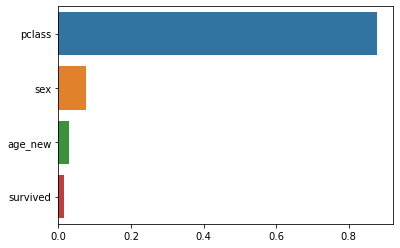

In [67]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# feature importance 추출
print("Feature importanes:\n{0}".format(np.round(dtrgs.feature_importances_, 3)))

# feature별 importance 매핑
f_i1 = {}
f_i2 = {}

for name, value in zip(X_train.columns, dtrgs.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value

result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)

for i, j in result1:
    f_i2[i] = j
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()